<a href="https://colab.research.google.com/github/jrgreen7/SYSC4906/blob/master/W2025/Tutorials/T7/Tutorial_7_contT6_DL_pretrained.ipynb" target="_blank"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Tutorial 7, based on 6 - DL and Pre-trained Models Experiment 

For tutorial seven, scroll down to the [Pre-trained models experiment](#pretrained).

**Course:** SYSC 4415 - Introduction to Machine Learning

**Semester:** Winter 2025

**Adapted by:** [Kevin Dick](https://kevindick.ai/) (Tutorial 6), [Igor Bogdanov](igorbogdanov@cmail.carleton.ca)

**Adapted from:** [Keras v. TensorFlow Tutorial](https://www.pyimagesearch.com/2018/10/08/keras-vs-tensorflow-which-one-is-better-and-which-one-should-i-learn/)

---

In this two-part notebook, we will demonstrate the creation of a Convolutional Neural Network classifier using both Keras and Pytorch.

**Part 0: Introduction to the Keras API**

**Part I: CNN for CIFAR-10 Classification**
1. load a benchmark computer vision dataset (CIFAR-10)
2. create a VGGNet-like architecture
3. train, evaluate, and test the model on the CIFAR-10 benchmark

---
# Part 0: Introduction to the Keras API

## Keras: The Python Deep Learning API

Keras is the **high-level API of TensorFlow 2.0**, meant to be an approachable and highly-productive interface for solving machine learning problems, with a focus on modern deep learning. It **provides essential abstractions** and building blocks for developing and shipping machine learning solutions with high iteration velocity.

## The Convolutional Neural Network (CNN)

In deep learning, a convolutional neural network (CNN, or ConvNet) is a class of deep neural networks, **most commonly applied to analyzing visual imagery**. They are also known as **shift invariant** or **space invariant artificial neural networks**, based on their shared-weights architecture and translation invariance characteristics.

In this tutorial, we will implement a VGG-type CNN based on the work of the **V**isual **G**eometry **G**roup at the University of Oxford. Several pre-trained model architectures and learned weights are easily downloadable from the Keras library, such as the **VGG-16 model**.

**Additional Reading**: [5 Popular CNN Architectures Clearly Explained and Visualized](https://towardsdatascience.com/5-most-well-known-cnn-architectures-visualized-af76f1f0065e/)

---

When first learning to create deep learning models, it is important to understand the role of each type of layer; familiarization of the **[Keras API documentation](https://keras.io/api/layers/))** is one of the best approaches!

For convenience, three of the **[Core Layers](https://keras.io/api/layers/core_layers/)** covered in part I of this tutorial are replicated here:

### Keras Layers: **[Input Object](https://keras.io/api/layers/core_layers/input/)**

```python
tf.keras.Input(
    shape=None,     # A shape tuple (integers), not including the batch size. For instance, shape=(32,) indicates that the expected input will be batches of 32-dimensional vectors.
    batch_size=None,# optional static batch size (integer).
    name=None,      # An optional name string for the layer. Should be unique in a model (do not reuse the same name twice).
    dtype=None,     # The data type expected by the input, as a string (float32, float64, int32...)
    sparse=False,   # A boolean specifying whether the placeholder to be created is sparse.
    tensor=None,    # Optional existing tensor to wrap into the Input layer.
    ragged=False,   # A boolean specifying whether the placeholder to be created is ragged.
    **kwargs
)
```

### Keras Layers: **[Dense Layer](https://keras.io/api/layers/core_layers/dense/)**


```python
tf.keras.layers.Dense(
    units,                              # Positive integer, dimensionality of the output space.
    activation=None,                    # Activation function to use. If you don't specify anything, no activation is applied (ie. "linear" activation: a(x) = x).
    use_bias=True,                      # Boolean, whether the layer uses a bias vector.
    kernel_initializer="glorot_uniform",# Initializer for the kernel weights matrix.
    bias_initializer="zeros",           # Initializer for the bias vector.
    kernel_regularizer=None,            # Regularizer function applied to the kernel weights matrix.
    bias_regularizer=None,              # Regularizer function applied to the bias vector.
    activity_regularizer=None,          # Regularizer function applied to the output of the layer (its "activation").
    kernel_constraint=None,             # Constraint function applied to the kernel weights matrix.
    bias_constraint=None,               # Constraint function applied to the bias vector.
    **kwargs
)
```

### Keras Layers: **[Activation Layer](https://keras.io/api/layers/core_layers/activation/)**
```python
tf.keras.layers.Activation(
  activation, # Activation function, such as tf.nn.relu, or string name of built-in activation function, such as "relu"
  **kwargs
)
```

---

# Part I: Building a VGG16 CNN Classifer for the the CIFAR-10 Dataset

- VGG16 developed by the VGG (Visual Geometry Group, University of Oxford) for the ILSVRC-2014 competition.
- Published at: [Very Deep Convolutional Networks for Large-Scale Image Recognition](https://arxiv.org/abs/1409.1556)
- Note that VGG16 is available (pre-trained) through Keras.applications

```python
from keras.applications import VGG16
imported_model = VGG16()
imported_model.summary()
```
    
- VGGNet-like architectures are characterized by:
    1. Using only 3×3 convolutional layers stacked on top of each other in increasing depth
    2. Reducing volume size by max pooling
    3. Fully-connected layers at the end of the network prior to a softmax classifier


### The CIFAR-10 Dataset

**CIFAR** = "Canadian Institute For Advanced Research"

A **benchmark dataset** is a reference database against which learning models are evaluated and performance assessed to determine whether or not a given approach is superior over another.

The CIFAR-10 dataset consists of 60,000 32x32 colour images in 10 classes, with 6,000 images per class. There are 50,000 training images and 10,000 test images.

The classes are: ["airplane", "automobile", "bird", "cat", "deer", "dog", "frog", "horse", "ship", "truck"]

The dataset is divided into **five training batches and one test batch**, each with 10,000 images. The **test batch contains exactly 1,000 randomly selected images from each class**. The training batches contain the remaining images in random order, but some training batches may contain more images from one class than another. Between them, the training batches contain exactly 5,000 images from each class.

Published at: https://www.cs.toronto.edu/~kriz/cifar.html

---

### Hardware Acceleration: Enabling the Colab GPU

To accelerate the training phase and inference phase of deep learning models, Google Colab provides GPUs that greatly accelerate model development.

For example, using CPU alone, each epoch of the CNN would require ~450 seconds, whereas with GPU, each only requires ~7s.

To verify whether GPUs are enabled:  `Runtime` $\rightarrow$ `Change runtime type` $\rightarrow$ `Hardware accelerator`

In [1]:
from keras.layers import BatchNormalization
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Activation
from keras.layers import Dropout
from keras.layers import Dense
from keras.layers import Flatten
from keras.layers import Input
from keras.models import Model
from keras.optimizers import SGD
from keras.callbacks import ModelCheckpoint

from keras.utils import plot_model
from IPython.display import Image, display

from sklearn.preprocessing import LabelBinarizer # For 1-hot encoding of 10 class labels
from keras.datasets import cifar10  						 # Built-in dataset of images.
from sklearn.metrics import classification_report


import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F
import torchvision
import torchvision.transforms as transforms
from torch.utils.data import Dataset, DataLoader


!pip install torchsummary
!pip install --upgrade --no-deps torchviz
!pip install pydot

from torchsummary import summary
from torchviz import make_dot
from IPython.display import Image, display

import numpy as np

import matplotlib
%matplotlib inline

import matplotlib.pyplot as plt
import pandas as pd
import time
import warnings

from tqdm import tqdm
import os

# Create directories if they don't exist to save the artifacts and model checkpoints
os.makedirs("images", exist_ok=True)
os.makedirs("checkpoints_keras", exist_ok=True)
os.makedirs("checkpoints_torch", exist_ok=True)


warnings.filterwarnings("ignore")

# Check if CUDA/MPS is available
device = (
    torch.device("cuda")
    if torch.cuda.is_available()
    else (
        torch.device("mps")
        if torch.backends.mps.is_available()
        else torch.device("cpu")
    )
)

print(f"Chosen device:{device}")

import tensorflow as tf
print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))
print("GPU Name:", tf.test.gpu_device_name())



Chosen device:cuda
Num GPUs Available:  1
GPU Name: /device:GPU:0


### Define the "MiniVGGnetKeras" Class and "MiniVGGNetTorch"

These classes will define the structure of the VGG deep network.

In [2]:
# Define a class to represent the VGG-type network. Instantiate using build()
class MiniVGGNetKeras:
	@staticmethod
	def build(width, height, depth, classes):
		# initialize the input shape and channel dimension, assuming
		# TensorFlow/channels-last ordering
		inputShape = (height, width, depth)
		chanDim = -1

		# define the model input (layer)
		inputs = Input(shape=inputShape)

  	# first (CONV => RELU) * 2 => POOL layer set
		x = Conv2D(32, (3, 3), padding="same")(inputs) # padding=same --> output same size as input by padding by filter/2 rows/cols of zeros
		x = Activation("relu")(x) 										 # Add a rectified linear unit activation function to each conv layer
		x = BatchNormalization(axis=chanDim)(x)  			 # Use batch normalization. We will talk about this later
		x = Conv2D(32, (3, 3), padding="same")(x)
		x = Activation("relu")(x)
		x = BatchNormalization(axis=chanDim)(x)
		x = MaxPooling2D(pool_size=(2, 2))(x) 					# MaxPooling uased after the first 2 conv layers. Reduces size of subsequent layers by down-sampling
		x = Dropout(0.25)(x)  													# Dropout used to promote generalization. We'll talk about this layer type later in the course...

		# second (CONV => RELU) * 2 => POOL layer set
		x = Conv2D(64, (3, 3), padding="same")(x)
		x = Activation("relu")(x)
		x = BatchNormalization(axis=chanDim)(x)
		x = Conv2D(64, (3, 3), padding="same")(x)
		x = Activation("relu")(x)
		x = BatchNormalization(axis=chanDim)(x)
		x = MaxPooling2D(pool_size=(2, 2))(x)
		x = Dropout(0.25)(x)

    # first (and only) set of FC => RELU layers
		x = Flatten()(x)  # Flatten the 2D maxPooling2D layer to feed into a fully-connected layer
		x = Dense(512)(x)
		x = Activation("relu")(x)
		x = BatchNormalization()(x)
		x = Dropout(0.5)(x)

		# Softmax classifier layer for arriving at normalized prediction scores for multi-class problem.
    # Softmax assigns decimal probabilities to each class in a multi-class problem. Those decimal probabilities must add up to 1.0.
    # Only makes sense when each image is expected to represent a single class (not a dog & a cat simultaneously)
		x = Dense(classes)(x)
		x = Activation("softmax")(x)

		# create the model and give it a unique name
		model = Model(inputs, x, name="minivggnet_keras")

		# return the constructed network architecture
		return model



class MiniVGGNetTorch(nn.Module):
    def __init__(self, num_classes=10):
        super(MiniVGGNetTorch, self).__init__()

        # First (CONV => RELU) * 2 => POOL layer set
        self.conv1 = nn.Sequential(
            nn.Conv2d(3, 32, kernel_size=3, padding=1),
            nn.ReLU(),
            nn.BatchNorm2d(32),
            nn.Conv2d(32, 32, kernel_size=3, padding=1),
            nn.ReLU(),
            nn.BatchNorm2d(32),
            nn.MaxPool2d(kernel_size=2, stride=2),
            nn.Dropout(0.25),
        )

        # Second (CONV => RELU) * 2 => POOL layer set
        self.conv2 = nn.Sequential(
            nn.Conv2d(32, 64, kernel_size=3, padding=1),
            nn.ReLU(),
            nn.BatchNorm2d(64),
            nn.Conv2d(64, 64, kernel_size=3, padding=1),
            nn.ReLU(),
            nn.BatchNorm2d(64),
            nn.MaxPool2d(kernel_size=2, stride=2),
            nn.Dropout(0.25),
        )

        # FC => RELU layers
        self.fc = nn.Sequential(
            nn.Flatten(),
            nn.Linear(64 * 8 * 8, 512),
            nn.ReLU(),
            nn.BatchNorm1d(512),
            nn.Dropout(0.5),
            nn.Linear(512, num_classes),
        )

    def forward(self, x):
        x = self.conv1(x)
        x = self.conv2(x)
        x = self.fc(x)
        return F.softmax(x, dim=1)


# Download and prepare the CIFAR-10 dataset
We are downloading both for Keras and PyTorch to keep everything separately.

In [3]:
# load the training and testing data, then scale it into the range [0, 1]
print("[INFO] loading CIFAR-10 data...")
((trainX, trainY), (testX, testY)) = cifar10.load_data()
trainX = trainX.astype("float") / 255.0
testX  = testX.astype("float") / 255.0

# convert the labels from integers to vectors
lb = LabelBinarizer()
trainY = lb.fit_transform(trainY)
testY = lb.transform(testY)

# initialize the label names for the CIFAR-10 dataset
label_names = ["airplane", "automobile", "bird", "cat", "deer",
	"dog", "frog", "horse", "ship", "truck"]


def load_cifar10_data(batch_size=32):
    """
    Load and preprocess CIFAR-10 dataset.

    Args:
        batch_size: Number of samples per batch

    Returns:
        trainloader: DataLoader for training data
        testloader: DataLoader for test data
        classes: Tuple of class names
    """
    print("[INFO] loading CIFAR-10 data...")

    # Define the transformation pipeline
    transform = transforms.Compose(
        [
            transforms.ToTensor(),  # Convert PIL Image to tensor and scale to [0,1]
            transforms.Normalize(
                (0.5, 0.5, 0.5), (0.5, 0.5, 0.5)
            ),  # Normalize with mean/std
        ]
    )

    # Load training data
    trainset = torchvision.datasets.CIFAR10(
        root="./data", train=True, download=True, transform=transform
    )
    trainloader = torch.utils.data.DataLoader(
        trainset, batch_size=batch_size, shuffle=True, num_workers=2
    )

    # Load test data
    testset = torchvision.datasets.CIFAR10(
        root="./data", train=False, download=True, transform=transform
    )
    testloader = torch.utils.data.DataLoader(
        testset, batch_size=batch_size, shuffle=False, num_workers=2
    )

    # Define class names
    classes = (
        "airplane",
        "automobile",
        "bird",
        "cat",
        "deer",
        "dog",
        "frog",
        "horse",
        "ship",
        "truck",
    )

    return trainloader, testloader, classes

trainloader, testloader, classes = load_cifar10_data()


[INFO] loading CIFAR-10 data...
[INFO] loading CIFAR-10 data...
Files already downloaded and verified
Files already downloaded and verified


# Build VGG16 models using the CIFAR-10 dataset

[INFO] compiling model...
[INFO] saving model visualization...


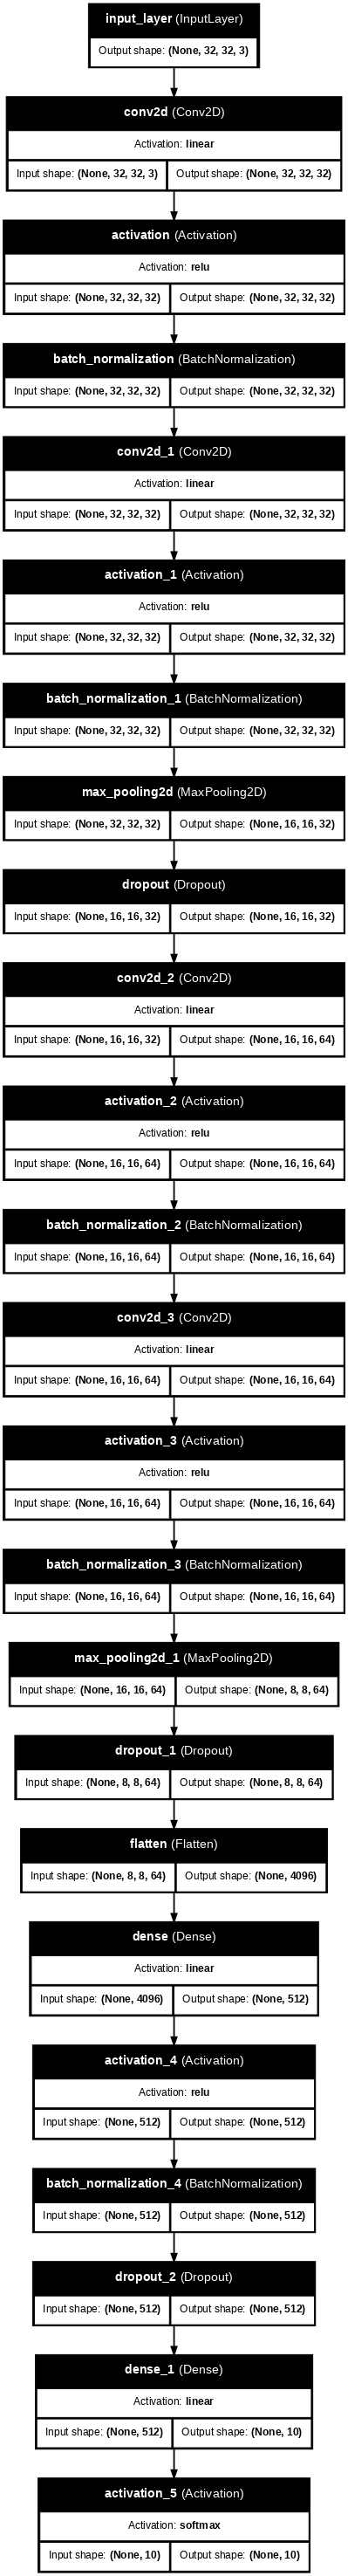

Model: "minivggnet_keras"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)             │ (None, 32, 32, 3)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d (Conv2D)                      │ (None, 32, 32, 32)          │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation (Activation)              │ (None, 32, 32, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 32, 32, 32)          │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 32, 32, 32)          │           9,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_1 (Activation)            │ (None, 32, 32, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_1                │ (None, 32, 32, 32)          │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 16, 16, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 16, 16, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 16, 16, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_2 (Activation)            │ (None, 16, 16, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_2                │ (None, 16, 16, 64)          │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 16, 16, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_3 (Activation)            │ (None, 16, 16, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_3                │ (None, 16, 16, 64)          │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 8, 8, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 8, 8, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 4096)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 512)                 │       2,097,664 │
├──────────────────────────────────────┼─────────────────────────────┼──────────────

 Total params: 2,171,178 (8.28 MB)

 Trainable params: 2,169,770 (8.28 MB)

 Non-trainable params: 1,408 (5.50 KB)

None
[INFO] compiling model...
Chosen device:cuda

Model Summary:
----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 32, 32, 32]             896
              ReLU-2           [-1, 32, 32, 32]               0
       BatchNorm2d-3           [-1, 32, 32, 32]              64
            Conv2d-4           [-1, 32, 32, 32]           9,248
              ReLU-5           [-1, 32, 32, 32]               0
       BatchNorm2d-6           [-1, 32, 32, 32]              64
         MaxPool2d-7           [-1, 32, 16, 16]               0
           Dropout-8           [-1, 32, 16, 16]               0
            Conv2d-9           [-1, 64, 16, 16]          18,496
             ReLU-10           [-1, 64, 16, 16]               0
      BatchNorm2d-11           [-1, 64, 16, 16]             128
           Conv2d-12           [-1, 64, 16, 16]          36,928
             ReLU-13           [-1, 6

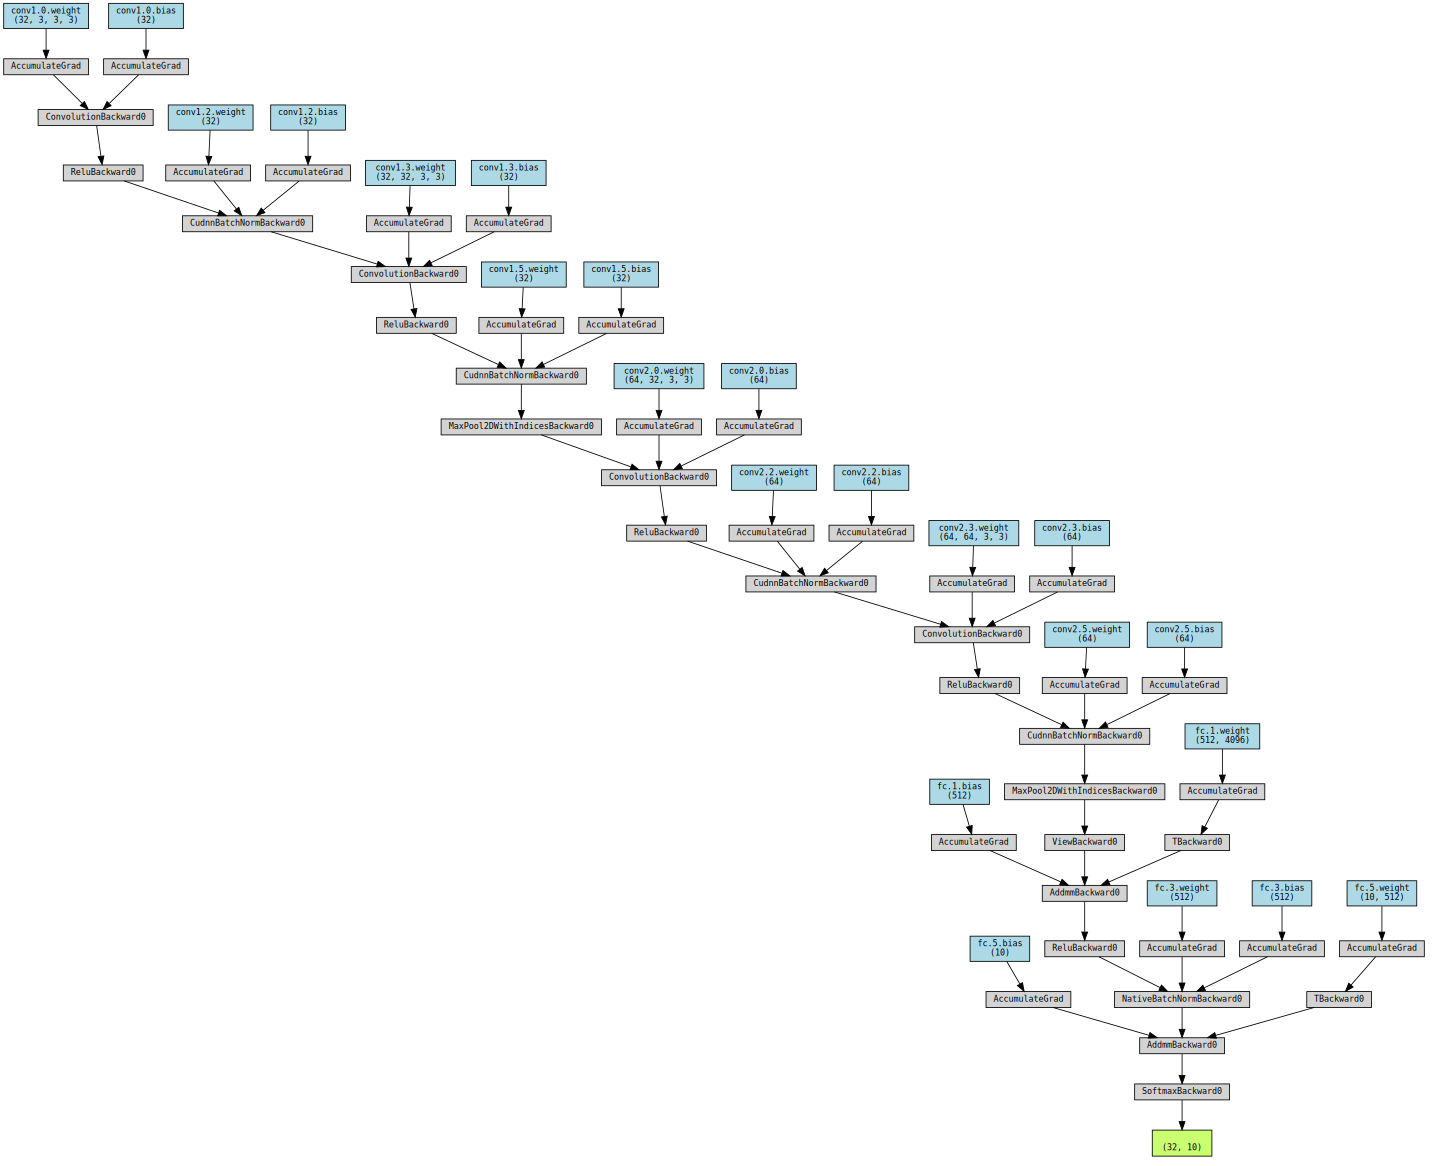

[INFO] saving model visualization...
[INFO] Models have been initialized...


In [4]:
# initialize the initial learning rate, total number of epochs to
# train for, and batch size
BATCH_SIZE = 32
INIT_LEARNING_RATE = 0.01
EPOCHS = 10 # Each epoch takes 450s using CPU and only ~30s using GPU (Runtime->Change runtime->EnableGPU)

# initialize the optimizer and model
print("[INFO] compiling model...")

import tensorflow as tf
gpus = tf.config.list_physical_devices('GPU')
if gpus:
  try:
    for gpu in gpus: tf.config.experimental.set_memory_growth(gpu, True)
  except RuntimeError as e:
    print(e)

opt = SGD(learning_rate=INIT_LEARNING_RATE, decay=INIT_LEARNING_RATE / EPOCHS)
model_keras = MiniVGGNetKeras.build(width=32, height=32, depth=3, classes=len(label_names))
model_keras.compile(loss="categorical_crossentropy", optimizer=opt, metrics=["accuracy"])

checkpoint = ModelCheckpoint(
    os.path.join("checkpoints_keras", "minivggnet_keras_cifar10_epoch_{epoch:02d}.keras"),
    monitor='val_loss',
    verbose=1,
    save_best_only=False,
    save_weights_only=False,
    mode='auto',
    save_freq='epoch'
)

print("[INFO] saving model visualization...")
# Save as PNG
plot_model(model_keras,
    to_file=os.path.join('images', 'model_architecture_keras.png'),
    show_shapes=True, show_layer_names=True, dpi=64,  # Lower DPI for smaller file size
    rankdir="TB",  # Left to right layout like PyTorch
    expand_nested=True,  # Show internal operations
    show_layer_activations=True )

# For display in notebook
display(Image(os.path.join('images', 'model_architecture_keras.png')))

print(model_keras.summary())

def initialize_model(num_classes, learning_rate, epochs):
    """
    Initialize the CNN model, loss function, and optimizer.

    Args:
        num_classes: Number of output classes
        learning_rate: Initial learning rate
        epochs: Total number of epochs for learning rate decay

    Returns:
        model: Initialized model
        loss_function: Loss function
        optimizer: Optimizer
    """
    print("[INFO] compiling model...")

    # Initialize model and move to appropriate device
    print(f"Chosen device:{device}")
    model = MiniVGGNetTorch(num_classes=num_classes).to(device)


    # Define loss function
    loss_function = nn.CrossEntropyLoss()

    # Initialize optimizer with learning rate decay
    optimizer = optim.SGD(
        model.parameters(),
        lr=learning_rate,
        momentum=0.9,
        weight_decay=learning_rate / epochs,  # This is equivalent to Keras' decay
    )

    # Print model summary using torchsummary if available
    try:
        print("\nModel Summary:")
        if str(device) == "mps":
            # Temporarily move model to CPU for summary
            model_cpu = model.to('cpu')
            summary(model_cpu, input_size=(3, 32, 32), device='cpu')
            # Move model back to MPS
            model = model.to(device)
        else:
            summary(model, input_size=(3, 32, 32), device=str(device))
    except ImportError:
        # Fallback to basic model print
        print("\nModel Architecture:")
        print(model)
        # Print parameter count
        total_params = sum(p.numel() for p in model.parameters())
        trainable_params = sum(p.numel() for p in model.parameters() if p.requires_grad)
        print(f"\nTotal parameters: {total_params:,}")
        print(f"Trainable parameters: {trainable_params:,}")

    # Optional: Visualize model architecture using torchviz
    try:
        model.eval()  # Set model to evaluation mode before visualization
        sample_input = torch.randn(32, 3, 32, 32).to(device)  # Use same batch_size as training
        dot = make_dot(model(sample_input), params=dict(model.named_parameters()))
        display(dot)
        print("[INFO] saving model visualization...")
        dot.render(os.path.join("images", "model_architecture_torch"), format="png", cleanup=True)

    except ImportError:
        print("torchviz not installed. Skip model visualization.")

    return model, loss_function, optimizer

model_torch, loss_function_torch, optimizer_torch = initialize_model(num_classes=len(classes), learning_rate=INIT_LEARNING_RATE, epochs=EPOCHS)

print("[INFO] Models have been initialized...")


# Train VGG16 models using the CIFAR-10 dataset

In [5]:
# train the network

print("Training data shapes:")
print(f"trainX shape: {trainX.shape}")
print(f"trainY shape: {trainY.shape}")
print(f"testX shape: {testX.shape}")
print(f"testY shape: {testY.shape}")

print("[INFO] training network for {0:d} epochs...".format(EPOCHS))
H = model_keras.fit(trainX, trainY, validation_data=(testX, testY),
	batch_size=BATCH_SIZE, epochs=EPOCHS, callbacks=[checkpoint],  # Add checkpoint callback
    verbose=1)

print("[INFO] saving final model...")
model_keras.save(os.path.join("checkpoints_keras", "minivggnet_keras_cifar10_final.keras"))

# In Keras, training is handled by the high-level model.fit() method,
# while PyTorch requires an explicit training loop.

def train_cnn(epochs, batch_size, learning_rate, model, criterion, optimizer, trainloader, testloader, classes):
    print("[INFO] training network...")
    history = {"train_loss": [], "train_acc": [], "val_loss": [], "val_acc": []}

    for epoch in range(epochs):
        model.train()
        running_loss = 0.0
        correct = 0
        total = 0

        # Training progress bar
        train_pbar = tqdm(trainloader, desc=f'Epoch {epoch+1}/{epochs}')
        for i, data in enumerate(train_pbar):
            inputs, labels = data[0].to(device), data[1].to(device)

            optimizer.zero_grad()
            outputs = model(inputs)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()

            # Track statistics
            running_loss += loss.item()
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()

            # Update progress bar
            train_pbar.set_postfix({
                'loss': f'{running_loss/(i+1):.4f}',
                'acc': f'{100.*correct/total:.2f}%'
            })

        # Calculate metrics
        train_loss = running_loss / len(trainloader)
        train_acc = 100 * correct / total

        # Validation progress bar
        val_loss = 0.0
        correct = 0
        total = 0

        val_pbar = tqdm(testloader, desc='Validation')
        model.eval()
        with torch.no_grad():
            for data in val_pbar:
                images, labels = data[0].to(device), data[1].to(device)
                outputs = model(images)
                loss = criterion(outputs, labels)
                val_loss += loss.item()
                _, predicted = torch.max(outputs.data, 1)
                total += labels.size(0)
                correct += (predicted == labels).sum().item()

                # Update validation progress bar
                val_pbar.set_postfix({
                    'val_loss': f'{val_loss/(i+1):.4f}',
                    'val_acc': f'{100.*correct/total:.2f}%'
                })

        val_loss = val_loss / len(testloader)
        val_acc = 100 * correct / total

        # Store history
        history["train_loss"].append(train_loss)
        history["train_acc"].append(train_acc)
        history["val_loss"].append(val_loss)
        history["val_acc"].append(val_acc)

        # Save checkpoint after each epoch
        print(f"\n[INFO] saving checkpoint for epoch {epoch+1}...")
        torch.save(
            {
                "epoch": epoch + 1,
                "model_state_dict": model.state_dict(),
                "optimizer_state_dict": optimizer.state_dict(),
                "train_loss": train_loss,
                "val_loss": val_loss,
                "history": history,
            },
             os.path.join("checkpoints_torch", f"minivggnet_torch_cifar10_epoch_{epoch+1}.pth")
        )

    # Save final model
    print("[INFO] saving final model...")
    torch.save(
        {
            "epoch": epochs,
            "model_state_dict": model.state_dict(),
            "optimizer_state_dict": optimizer.state_dict(),
            "history": history,
        },
        os.path.join("checkpoints_torch", "minivggnet_torch_cifar10_final.pth")
    )

    return model, history


model_torch_trained, history_torch = train_cnn(EPOCHS, BATCH_SIZE, INIT_LEARNING_RATE, model_torch, loss_function_torch, optimizer_torch, trainloader, testloader, classes)




Training data shapes:
trainX shape: (50000, 32, 32, 3)
trainY shape: (50000, 10)
testX shape: (10000, 32, 32, 3)
testY shape: (10000, 10)
[INFO] training network for 10 epochs...
Epoch 1/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.3401 - loss: 2.1437
Epoch 1: saving model to checkpoints_keras/minivggnet_keras_cifar10_epoch_01.keras
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 18s 7ms/step - accuracy: 0.3401 - loss: 2.1435 - val_accuracy: 0.5430 - val_loss: 1.2770
Epoch 2/10
1559/1563 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5397 - loss: 1.2879
Epoch 2: saving model to checkpoints_keras/minivggnet_keras_cifar10_epoch_02.keras
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.5398 - loss: 1.2878 - val_accuracy: 0.6007 - val_loss: 1.1102
Epoch 3/10
1554/1563 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6130 - loss: 1.0906
Epoch 3: saving model to checkpoints_keras/minivggnet_keras_cifar10_epoch_03.keras
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.6131 - loss:

Validation: 100%|██████████| 313/313 [00:01<00:00, 180.61it/s, val_loss=0.3766, val_acc=58.01%]



[INFO] saving checkpoint for epoch 1...


Validation: 100%|██████████| 313/313 [00:01<00:00, 187.35it/s, val_loss=0.3583, val_acc=67.62%]



[INFO] saving checkpoint for epoch 2...


Validation: 100%|██████████| 313/313 [00:01<00:00, 182.54it/s, val_loss=0.3531, val_acc=70.48%]



[INFO] saving checkpoint for epoch 3...


Validation: 100%|██████████| 313/313 [00:01<00:00, 183.51it/s, val_loss=0.3491, val_acc=72.45%]



[INFO] saving checkpoint for epoch 4...


Validation: 100%|██████████| 313/313 [00:01<00:00, 183.02it/s, val_loss=0.3454, val_acc=74.53%]



[INFO] saving checkpoint for epoch 5...


Validation: 100%|██████████| 313/313 [00:01<00:00, 188.71it/s, val_loss=0.3432, val_acc=75.72%]



[INFO] saving checkpoint for epoch 6...


Validation: 100%|██████████| 313/313 [00:01<00:00, 183.26it/s, val_loss=0.3409, val_acc=77.28%]



[INFO] saving checkpoint for epoch 7...


Validation: 100%|██████████| 313/313 [00:01<00:00, 187.27it/s, val_loss=0.3402, val_acc=77.67%]



[INFO] saving checkpoint for epoch 8...


Validation: 100%|██████████| 313/313 [00:01<00:00, 194.74it/s, val_loss=0.3423, val_acc=76.42%]



[INFO] saving checkpoint for epoch 9...


Validation: 100%|██████████| 313/313 [00:01<00:00, 187.01it/s, val_loss=0.3397, val_acc=77.76%]



[INFO] saving checkpoint for epoch 10...
[INFO] saving final model...


# Compare VGG16 models performance over epochs

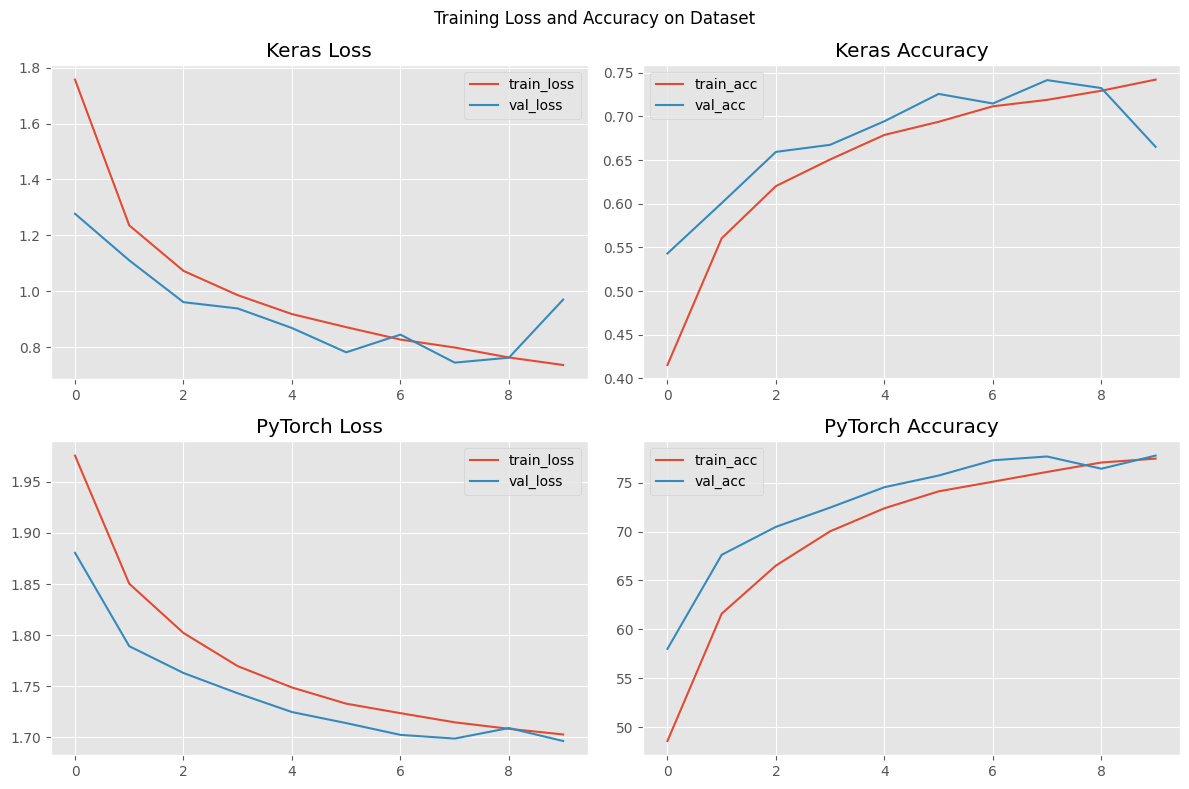

In [6]:
plt.style.use("ggplot")
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(12, 8))
fig.suptitle("Training Loss and Accuracy on Dataset")

# Keras plots (top row)
ax1.plot(np.arange(0, EPOCHS), H.history["loss"], label="train_loss")
ax1.plot(np.arange(0, EPOCHS), H.history["val_loss"], label="val_loss")
ax1.set_title('Keras Loss')
ax1.legend()

ax2.plot(np.arange(0, EPOCHS), H.history["accuracy"], label="train_acc")
ax2.plot(np.arange(0, EPOCHS), H.history["val_accuracy"], label="val_acc")
ax2.set_title('Keras Accuracy')
ax2.legend()

# PyTorch plots (bottom row)
ax3.plot(np.arange(0, EPOCHS), history_torch["train_loss"], label="train_loss")
ax3.plot(np.arange(0, EPOCHS), history_torch["val_loss"], label="val_loss")
ax3.set_title('PyTorch Loss')
ax3.legend()

ax4.plot(np.arange(0, EPOCHS), history_torch["train_acc"], label="train_acc")
ax4.plot(np.arange(0, EPOCHS), history_torch["val_acc"], label="val_acc")
ax4.set_title('PyTorch Accuracy')
ax4.legend()

plt.tight_layout()
plt.savefig(os.path.join('images', 'training_history_comparison.png'))
plt.show()



# Test the trained VGG16 network on the test data

In [7]:

# Evaluate Keras model
print("\nKeras Model Evaluation:")
predictions_keras = model_keras.predict(testX, batch_size=32)
print(classification_report(testY.argmax(axis=1),
    predictions_keras.argmax(axis=1), target_names=label_names))

# Evaluate PyTorch model
print("\nPyTorch Model Evaluation:")
model_torch.eval()  # Set to evaluation mode
with torch.no_grad():
    test_data = torch.FloatTensor(testX).permute(0, 3, 1, 2).to(device)  # Convert to PyTorch format
    predictions_torch = model_torch(test_data)
    predictions_torch = predictions_torch.cpu().numpy()
print(classification_report(testY.argmax(axis=1),
    predictions_torch.argmax(axis=1), target_names=label_names))





Keras Model Evaluation:
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
              precision    recall  f1-score   support

    airplane       0.86      0.45      0.59      1000
  automobile       0.90      0.81      0.85      1000
        bird       0.51      0.58      0.54      1000
         cat       0.42      0.61      0.50      1000
        deer       0.62      0.65      0.64      1000
         dog       0.67      0.50      0.57      1000
        frog       0.54      0.93      0.69      1000
       horse       0.92      0.58      0.71      1000
        ship       0.82      0.75      0.78      1000
       truck       0.85      0.80      0.82      1000

    accuracy                           0.67     10000
   macro avg       0.71      0.67      0.67     10000
weighted avg       0.71      0.67      0.67     10000


PyTorch Model Evaluation:
              precision    recall  f1-score   support

    airplane       0.36      0.78      0.50      1000
  automobile       0.99      0.16      

The **[f1-score](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.f1_score.html)** gives you the **harmonic mean of precision and recall**. The scores corresponding to every class will tell you the accuracy of the classifier in classifying the data points in that particular class compared to all other classes.

The **[support](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.precision_recall_fscore_support.html)** is the **number of samples of the true response** that lie in **that class**.

In [8]:
from keras.utils import Sequence
from keras.layers import GlobalAveragePooling2D
from keras.applications import VGG19
import cv2

import torch
from torchvision import models

In [9]:
print("\n[INFO] Comparing with Pre-trained Models...")

print("[INFO] Initial data shapes:")
print(f"testX shape: {testX.shape}")
print(f"testY shape: {testY.shape}")

# Initialize data loaders
print("[INFO] Initializing data loaders...")
# PyTorch data loaders - using existing CIFAR10 loading function
train_loader, test_loader, classes = load_cifar10_data()
print("[INFO] Data loaders initialized successfully")


[INFO] Comparing with Pre-trained Models...
[INFO] Initial data shapes:
testX shape: (10000, 32, 32, 3)
testY shape: (10000, 10)
[INFO] Initializing data loaders...
[INFO] loading CIFAR-10 data...
Files already downloaded and verified
Files already downloaded and verified
[INFO] Data loaders initialized successfully


# Experiment with Pre-trained Models
<a id="pretrained"></a>
For this experiment we will take Keras and PyTorch models pretrained on Imagenet, adapt them for out new dataset and compare their efficiency.

We are implementing two approaches to adapt pre-trained models to our needs.

## Approach 1: Feature Extraction.
It means we will be extracting features using weights of pretrained models.

For this paticular approach we need to do the following:

1. Load a model pre-trained on a large dataset (like ImageNet)
2. We freeze all (or most) of its layers, these frozen layers act as fixed feature extractors.
3. Create new classifier only
4. We only train a new classifier head on the model's top. The classifier learns to use the extracted features for our specific task.


In [16]:
print("\n[INFO] Implementing Feature Extraction Approach...")

# Keras Feature Extraction
print("\n=== Keras Feature Extraction Model ===")
# Get VGG19 without top layer and freeze base layers

base_model_keras = VGG19(
    weights="imagenet",
    include_top=False,
    input_shape=(32, 32, 3),  # Use original CIFAR size
)


for layer in base_model_keras.layers:
    layer.trainable = False

# Add new classifier head for CIFAR-10
x = base_model_keras.output
# x = GlobalAveragePooling2D()(x)
x = Flatten()(x)
x = Dense(512, activation="relu")(x)  # First dense layer
x = Dropout(0.5)(x)
predictions = Dense(len(label_names), activation="softmax")(x)

# Create new model
feature_extraction_model = Model(inputs=base_model_keras.input, outputs=predictions)

# Compile model
feature_extraction_model.compile(
    optimizer=SGD(learning_rate=0.001),
    loss="categorical_crossentropy",
    metrics=["accuracy"],
)

print("[INFO] Training Feature Extraction model...")
# Train using original splits

history_feature = feature_extraction_model.fit(
    trainX,
    trainY,
    validation_data=(testX, testY),
    epochs=10,
    verbose=1,
    batch_size=BATCH_SIZE,
)

predictions_feature = feature_extraction_model.predict(testX, batch_size=32)

print("\nFeature Extraction Model Results:")
print(
    classification_report(
        testY.argmax(axis=1),
        predictions_feature.argmax(axis=1),
        target_names=label_names,
    )
)



[INFO] Implementing Feature Extraction Approach...

=== Keras Feature Extraction Model ===
[INFO] Training Feature Extraction model...
Epoch 1/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.1652 - loss: 2.2871 - val_accuracy: 0.3644 - val_loss: 1.9462
Epoch 2/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.3005 - loss: 1.9687 - val_accuracy: 0.4014 - val_loss: 1.8155
Epoch 3/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.3478 - loss: 1.8481 - val_accuracy: 0.4209 - val_loss: 1.7355
Epoch 4/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.3723 - loss: 1.7857 - val_accuracy: 0.4332 - val_loss: 1.6778
Epoch 5/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.3951 - loss: 1.7266 - val_accuracy: 0.4486 - val_loss: 1.6355
Epoch 6/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.4053 - loss: 1.6864 - val_accuracy: 0.4539 - val_loss: 1.6026
Epoch 7/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.4159 - loss: 1.

In [11]:
print("\n=== PyTorch Feature Extraction Model ===")

# Get VGG19 and freeze base layers
base_model_torch = models.vgg19(pretrained=True)
for param in base_model_torch.parameters():
    param.requires_grad = False

# Modify classifier with same architecture as Keras version
base_model_torch.classifier = nn.Sequential(
    nn.Flatten(),
    nn.Linear(512 * 7 * 7, 512),
    nn.ReLU(),
    nn.Dropout(0.5),
    nn.Linear(512, len(classes)),
    nn.Softmax(dim=1),
)

# Move model to device
base_model_torch = base_model_torch.to(device)

# Training setup
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(base_model_torch.classifier.parameters(), lr=0.001)

print("[INFO] Training PyTorch Feature Extraction model...")
for epoch in range(3):
    base_model_torch.train()
    running_loss = 0.0
    train_iterator = tqdm(train_loader, desc=f"Epoch {epoch+1}/3")

    for inputs, labels in train_iterator:
        inputs, labels = inputs.to(device), labels.to(device)
        optimizer.zero_grad()
        outputs = base_model_torch(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        running_loss += loss.item()
        train_iterator.set_postfix({"loss": running_loss / len(train_loader)})

print("[INFO] Evaluating PyTorch Feature Extraction model...")
base_model_torch.eval()
predictions_torch = []
true_labels = []

with torch.no_grad():
    for inputs, labels in test_loader:
        inputs = inputs.to(device)
        outputs = base_model_torch(inputs)
        _, predicted = torch.max(outputs.data, 1)
        predictions_torch.extend(predicted.cpu().numpy())
        true_labels.extend(labels.numpy())

print("\nPyTorch Feature Extraction Model Results:")
print(classification_report(true_labels, predictions_torch, target_names=classes))


=== PyTorch Feature Extraction Model ===
[INFO] Training PyTorch Feature Extraction model...


Epoch 3/3: 100%|██████████| 1563/1563 [00:08<00:00, 181.89it/s, loss=1.92]


[INFO] Evaluating PyTorch Feature Extraction model...

PyTorch Feature Extraction Model Results:
              precision    recall  f1-score   support

    airplane       0.60      0.62      0.61      1000
  automobile       0.63      0.65      0.64      1000
        bird       0.51      0.36      0.42      1000
         cat       0.48      0.48      0.48      1000
        deer       0.52      0.48      0.50      1000
         dog       0.62      0.52      0.56      1000
        frog       0.56      0.74      0.64      1000
       horse       0.61      0.60      0.60      1000
        ship       0.63      0.65      0.64      1000
       truck       0.60      0.67      0.63      1000

    accuracy                           0.58     10000
   macro avg       0.58      0.58      0.57     10000
weighted avg       0.58      0.58      0.57     10000



## Approach 2: Fine-tuning

In this approach we are training both classifier to be able to handle new classes and trying to adaplt model layers to the new dataset.

For this particular approach we need to do the following:
1. Start with the feature extraction setup (pre-trained model with frozen layers)
2. Train only the classifier head first to initialize it with reasonable weights
3. Unfreeze some of the top layers of the pre-trained model (typically the last few convolutional layers)
4. Continue training the entire model with a much lower learning rate to carefully adapt the pre-trained features to our new dataset
5. Use early stopping to prevent overfitting during the fine-tuning process

This approach allows the model to adapt its feature extractors to better match our specific task while preserving the general knowledge learned from the original dataset.

In [12]:
print("\n[INFO] Implementing Fine-tuning Approach (Approach 2)...")

# Keras Fine-tuning Implementation
print("\n=== Keras Fine-tuning Model ===")
# Get fresh VGG19 model
base_model_keras_ft = VGG19(
    weights="imagenet", include_top=False, input_shape=(32, 32, 3)
)

# Initially freeze all layers
for layer in base_model_keras_ft.layers:
    layer.trainable = False

# Add new classifier head
x = base_model_keras_ft.output
x = Flatten()(x)
x = Dense(512, activation="relu")(x)
x = Dropout(0.5)(x)
predictions = Dense(len(label_names), activation="softmax")(x)

fine_tuning_model = Model(inputs=base_model_keras_ft.input, outputs=predictions)

# First phase - train only the classifier
print("[INFO] Training top layers...")
fine_tuning_model.compile(
    optimizer=SGD(learning_rate=0.001),
    loss="categorical_crossentropy",
    metrics=["accuracy"],
)

# Add early stopping
early_stopping = tf.keras.callbacks.EarlyStopping(
    monitor="val_loss", patience=3, restore_best_weights=True
)

# Train top layers first for 5 epochs

history_ft_phase1 = fine_tuning_model.fit(
    trainX,
    trainY,
    validation_data=(testX, testY),
    epochs=5,
    batch_size=BATCH_SIZE,
    callbacks=[early_stopping],
)

# Second phase - unfreeze and fine-tune last few convolutional layers
print("[INFO] Fine-tuning last convolutional layers...")
# Unfreeze last 4 convolutional layers
for layer in base_model_keras_ft.layers[-4:]:
    layer.trainable = True

# Use a lower learning rate for fine-tuning
fine_tuning_model.compile(
    optimizer=SGD(learning_rate=0.0001),  # 10x lower learning rate
    loss="categorical_crossentropy",
    metrics=["accuracy"],
)

# Train the model with unfrozen layers for 5 more
history_ft_phase2 = fine_tuning_model.fit(
    trainX,
    trainY,
    validation_data=(testX, testY),
    epochs=5,
    batch_size=BATCH_SIZE,
    callbacks=[early_stopping],
)

# Evaluate fine-tuned model
print("[INFO] Evaluating fine-tuned model...")
predictions_ft = fine_tuning_model.predict(testX, batch_size=BATCH_SIZE)
print("\nFine-tuned Model Results:")
print(
    classification_report(
        testY.argmax(axis=1), predictions_ft.argmax(axis=1), target_names=label_names
    )
)



[INFO] Implementing Fine-tuning Approach (Approach 2)...

=== Keras Fine-tuning Model ===
[INFO] Training top layers...
Epoch 1/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.1537 - loss: 2.3187 - val_accuracy: 0.3666 - val_loss: 1.9479
Epoch 2/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.2983 - loss: 1.9758 - val_accuracy: 0.4022 - val_loss: 1.8134
Epoch 3/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.3569 - loss: 1.8458 - val_accuracy: 0.4245 - val_loss: 1.7312
Epoch 4/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.3804 - loss: 1.7800 - val_accuracy: 0.4353 - val_loss: 1.6768
Epoch 5/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.3948 - loss: 1.7297 - val_accuracy: 0.4463 - val_loss: 1.6353
[INFO] Fine-tuning last convolutional layers...
Epoch 1/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 12s 6ms/step - accuracy: 0.4180 - loss: 1.6537 - val_accuracy: 0.4865 - val_loss: 1.4880
Epoch 2/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - 

In [13]:
# PyTorch Fine-tuning Implementation
print("\n=== PyTorch Fine-tuning Model ===")
# Get fresh VGG19
base_model_torch_ft = models.vgg19(pretrained=True)

# Initially freeze all parameters
for param in base_model_torch_ft.parameters():
    param.requires_grad = False

# Replace classifier
base_model_torch_ft.classifier = nn.Sequential(
    nn.Flatten(),
    nn.Linear(512 * 7 * 7, 512),
    nn.ReLU(),
    nn.Dropout(0.5),
    nn.Linear(512, len(classes)),
    nn.Softmax(dim=1),
)

# Move model to device
base_model_torch_ft = base_model_torch_ft.to(device)

# First phase - train only classifier
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(base_model_torch_ft.classifier.parameters(), lr=0.001)

print("[INFO] Training classifier layers...")
# Training loop for phase 1
for epoch in range(5):
    base_model_torch_ft.train()
    running_loss = 0.0
    train_iterator = tqdm(train_loader, desc=f"Phase 1 - Epoch {epoch+1}/5")

    for inputs, labels in train_iterator:
        inputs, labels = inputs.to(device), labels.to(device)
        optimizer.zero_grad()
        outputs = base_model_torch_ft(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        running_loss += loss.item()
        train_iterator.set_postfix({"loss": running_loss / len(train_loader)})

# Second phase - unfreeze and fine-tune last few layers
print("[INFO] Fine-tuning last convolutional layers...")
# Unfreeze last few convolutional layers
for param in base_model_torch_ft.features[-4:].parameters():
    param.requires_grad = True

# Use lower learning rate for fine-tuning
optimizer = optim.SGD(
    [
        {"params": base_model_torch_ft.features[-4:].parameters(), "lr": 0.0001},
        {"params": base_model_torch_ft.classifier.parameters(), "lr": 0.001},
    ]
)

# Training loop for phase 2
for epoch in range(5):
    base_model_torch_ft.train()
    running_loss = 0.0
    train_iterator = tqdm(train_loader, desc=f"Phase 2 - Epoch {epoch+1}/5")

    for inputs, labels in train_iterator:
        inputs, labels = inputs.to(device), labels.to(device)
        optimizer.zero_grad()
        outputs = base_model_torch_ft(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        running_loss += loss.item()
        train_iterator.set_postfix({"loss": running_loss / len(train_loader)})

# Evaluate fine-tuned PyTorch model
print("[INFO] Evaluating PyTorch fine-tuned model...")
base_model_torch_ft.eval()
predictions_torch_ft = []
true_labels = []

with torch.no_grad():
    for inputs, labels in test_loader:
        inputs = inputs.to(device)
        outputs = base_model_torch_ft(inputs)
        _, predicted = torch.max(outputs.data, 1)
        predictions_torch_ft.extend(predicted.cpu().numpy())
        true_labels.extend(labels.numpy())

print("\nPyTorch Fine-tuned Model Results:")
print(classification_report(true_labels, predictions_torch_ft, target_names=classes))


=== PyTorch Fine-tuning Model ===
[INFO] Training classifier layers...


Phase 1 - Epoch 5/5: 100%|██████████| 1563/1563 [00:08<00:00, 179.04it/s, loss=1.89]


[INFO] Fine-tuning last convolutional layers...


Phase 2 - Epoch 5/5: 100%|██████████| 1563/1563 [00:09<00:00, 168.08it/s, loss=1.85]


[INFO] Evaluating PyTorch fine-tuned model...

PyTorch Fine-tuned Model Results:
              precision    recall  f1-score   support

    airplane       0.66      0.68      0.67      1000
  automobile       0.68      0.71      0.69      1000
        bird       0.60      0.44      0.51      1000
         cat       0.52      0.51      0.52      1000
        deer       0.54      0.58      0.56      1000
         dog       0.63      0.56      0.59      1000
        frog       0.64      0.73      0.68      1000
       horse       0.65      0.66      0.66      1000
        ship       0.65      0.70      0.67      1000
       truck       0.70      0.68      0.69      1000

    accuracy                           0.63     10000
   macro avg       0.63      0.63      0.62     10000
weighted avg       0.63      0.63      0.62     10000



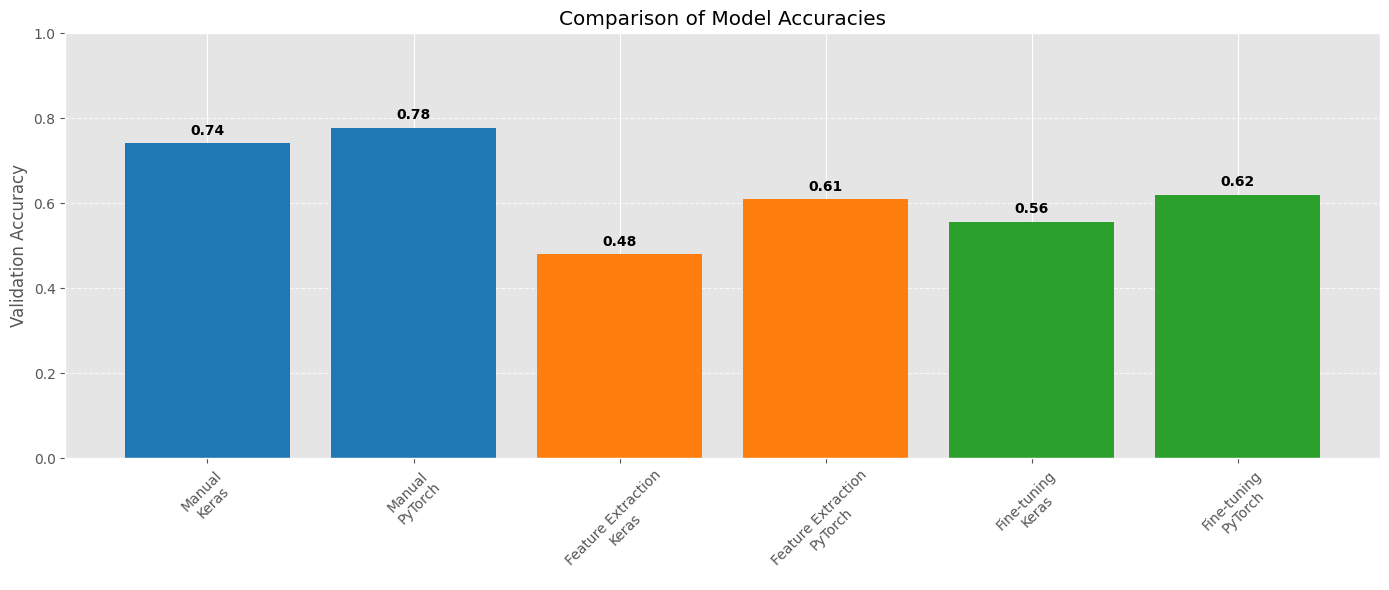

In [14]:
# Plot comparison of all approaches
plt.style.use("ggplot")
plt.figure(figsize=(14, 6))
plt.title("Comparison of Model Accuracies")
models = [
    "Manual\nKeras",
    "Manual\nPyTorch",
    "Feature Extraction\nKeras",
    "Feature Extraction\nPyTorch",
    "Fine-tuning\nKeras",
    "Fine-tuning\nPyTorch",
]
accuracies = [
    np.max(H.history["val_accuracy"]),  # Manual Keras
    np.max(history_torch["val_acc"]) / 100,  # Manual PyTorch (convert from percentage)
    np.max(history_feature.history["val_accuracy"]),  # Feature Extraction Keras
    0.61,  # Feature Extraction PyTorch (from classification report)
    np.max(history_ft_phase2.history["val_accuracy"]),  # Fine-tuning Keras
    0.62,  # Fine-tuning PyTorch (from classification report)
]

# Add color coding by approach type
colors = [
    "#1f77b4",
    "#1f77b4",
    "#ff7f0e",
    "#ff7f0e",
    "#2ca02c",
    "#2ca02c",
]  # Same color for same approach

plt.bar(models, accuracies, color=colors)
plt.ylabel("Validation Accuracy")
plt.ylim(0, 1.0)  # Set y-axis from 0 to 1
plt.xticks(rotation=45)
plt.grid(axis="y", linestyle="--", alpha=0.7)

# Add value labels on top of each bar
for i, v in enumerate(accuracies):
    plt.text(i, v + 0.02, f"{v:.2f}", ha="center", fontweight="bold")

plt.tight_layout()
plt.savefig(os.path.join("images", "model_comparison.png"))
plt.show()
